# Linear Regression

In [2]:
x=[1,2,3,4,5]
y=[3,4,2,4,5]
n=len(x)
mean_x=sum(x)/n
mean_y=sum(y)/n
# m=sigma(x-x`)(y-y`)/sigma(x-x`)
num=sum((x[i]-mean_x)*(y[i]-mean_y) for i in range(n))
den=sum((x[i]-mean_x) **2 for i in range(n))
m=num/den
c=mean_y-m*mean_x

print(f'The line equation is y={m:.2f}x+{c:.2f}')


The line equation is y=0.40x+2.40


In [17]:
import numpy as np

def LinearRegression(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    num = 0
    den = 0
    n = len(x)
    
    for i in range(n):
        num += (x[i] - mean_x) * (y[i] - mean_y)
        den += (x[i] - mean_x) ** 2
    
    m = num / den
    c = mean_y - m * mean_x
    
    return m, c

def predict(X, m, c):
    ypred = []
    for i in range(len(X)):
        ypred.append(m * X[i] + c)
    return ypred

def r2score(y,y_pred):
    y_m=np.mean(y)
    print(y_m)
    num=0
    den=0
    for i in range(len(y)):
        num=num+(y_pred[i]-y_m)**2
        den=den+(y[i]-y_m)**2
    return num/den;

x = [1, 2, 3, 4, 5]
y = [3, 4, 2, 4, 5]

m, c = LinearRegression(x, y)
y_pred = predict(x, m, c)

print(f'The line equation is y = {m:.2f}x + {c:.2f}')
print(f'Predicted y values: {y_pred}')
print(f'Accuray:',1-r2score(y,y_pred))


The line equation is y = 0.40x + 2.40
Predicted y values: [2.8, 3.2, 3.6, 4.0, 4.4]
3.6
Accuray: 0.6923076923076922


In [12]:
y,y_pred

([3, 4, 2, 4, 5], [2.8, 3.2, 3.6, 4.0, 4.4])

In [18]:
import pandas as pd
df=pd.read_csv("headbrain.csv")
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [19]:
import numpy as np

In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [21]:
df.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [22]:
df.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [26]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Gender, Age Range, Head Size(cm^3), Brain Weight(grams)]
Index: []


In [ ]:
X=list(df['Head Size(cm^3)'].values
y=list(df['Brain Weight(grams)'].values

In [30]:
import numpy as np

def LinearRegression(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    num = 0
    den = 0
    n = len(x)
    
    for i in range(n):
        num += (x[i] - mean_x) * (y[i] - mean_y)
        den += (x[i] - mean_x) ** 2
    
    m = num / den
    c = mean_y - m * mean_x
    
    return m, c

def predict(X, m, c):
    ypred = []
    for i in range(len(X)):
        ypred.append(m * X[i] + c)
    return ypred

def r2score(y, y_pred):
    y_m = np.mean(y)
    num = 0
    den = 0
    for i in range(len(y)):
        num += (y_pred[i] - y_m) ** 2
        den += (y[i] - y_m) ** 2
    return num / den

# Assuming df is already loaded with data
X = list(df['Head Size(cm^3)'].values)
y = list(df['Brain Weight(grams)'].values)

m, c = LinearRegression(X, y)  # Corrected from 'x' to 'X'
y_pred = predict(X, m, c)      # Corrected from 'x' to 'X'

print(f'The line equation is y = {m:.2f}x + {c:.2f}')
#print(f'Predicted y values: {y_pred}')
print(f'Accuracy: {1 - r2score(y, y_pred)}')  # Corrected to return the correct R^2 score


The line equation is y = 0.26x + 325.57
Accuracy: 0.3606882800429999


# operations on California House pricing dataset

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [35]:
#step load dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Price'] = california.target
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [37]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [38]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

**scatter plot**

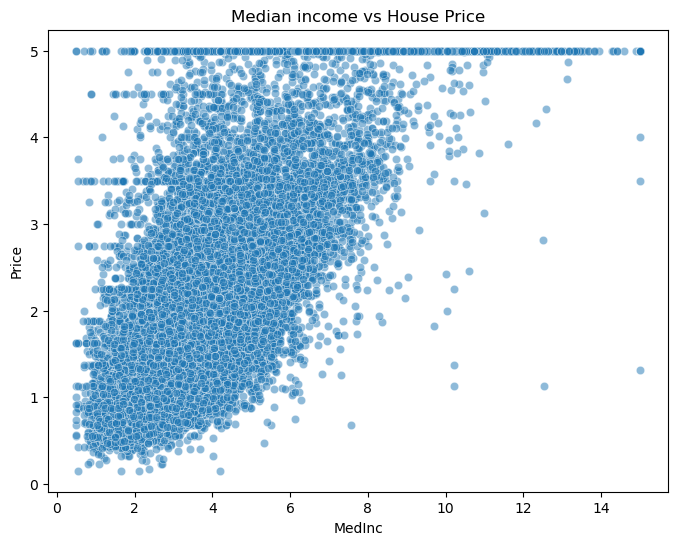

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.scatterplot(x='MedInc',y='Price',data=df,alpha=0.5)
plt.title('Median income vs House Price')
plt.show()

**Heatmap**

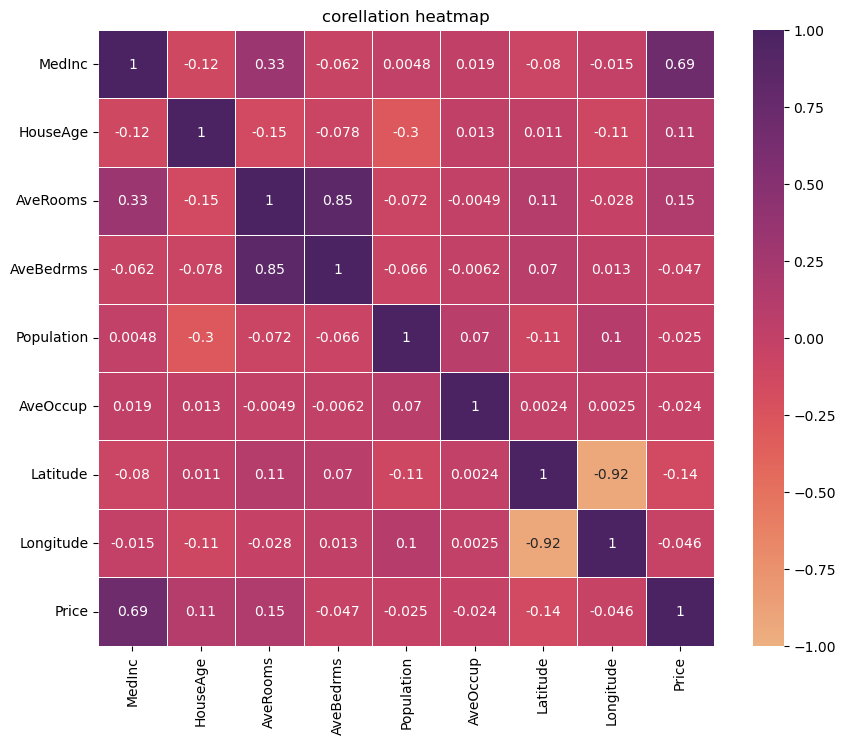

In [44]:
corr_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='flare',vmin=-1,vmax=1,center=0,square=True,linewidths=0.5)
plt.title("corellation heatmap")
plt.show()

**median income has more corelation **

In [47]:
#median income has more corelation 
X=df[['MedInc']]
y=df['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [48]:
#Applying Linear Regression
model=LinearRegression()
model.fit(X_train,y_train)
print(f"\n Linear Equation:price={model.coef_[0]:.2f}* MedInc+ {model.intercept_:.2f}")


 Linear Equation:price=0.42* MedInc+ 0.44


In [50]:
#predict and Evaluate
y_pred=model.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print(f"\nMAE:{mae:.2f} $100k")
print(f"RMSE:{rmse:.2f} $100k")
print(f"R²:{r2:.2f}")


MAE:0.63 $100k
RMSE:0.84 $100k
R²:0.46


**Scatter plot**

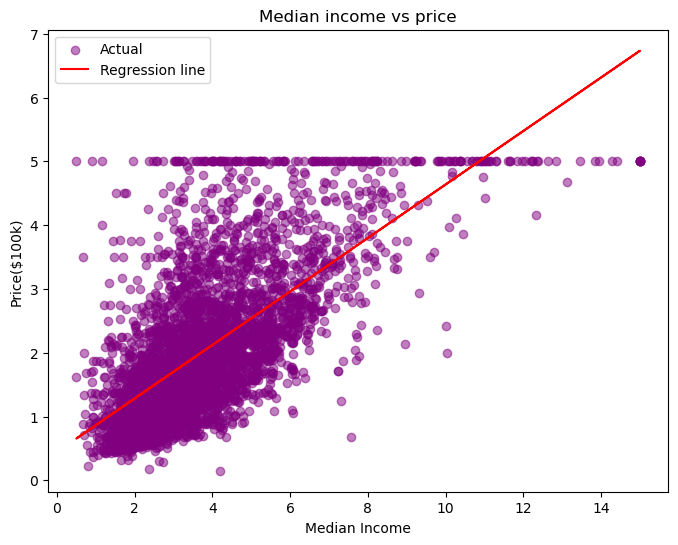

In [53]:
#visualization
plt.figure(figsize=(8,6))
plt.scatter(X_test,y_test,color='purple',label='Actual',alpha=0.5)
plt.plot(X_test,y_pred,color='red',label='Regression line')
plt.title('Median income vs price')
plt.xlabel('Median Income')
plt.ylabel('Price($100k)')
plt.legend()
plt.show()

**Applying KFold -Cross Validation**

In [1]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

X,y=make_regression(n_samples=100,n_features=2,noise=20)

kf=KFold(n_splits=5,shuffle=True,random_state=42)
model=LinearRegression()

scores=cross_val_score(model,X,y,cv=kf,scoring='r2')
print("Cross validation scores:",scores)
print("Average score",scores.mean())

Cross validation scores: [0.71711337 0.61265642 0.7311246  0.41400306 0.52229458]
Average score 0.5994384063118188
